# Image Analysis

In this notebook we will introduce the concepts of data extraction and data manipulation of visual elements such as charts, images and tables using prompts and the OpenAI models. In this notebook, we will experiment with different elements and different prompts, and we will see how we can extract information in different formats using the very capable GPT-4 family of models. 


### Python Imports


In [2]:
%load_ext autoreload
%autoreload 2


import sys
sys.path.append('..\\code')


import os
from dotenv import load_dotenv
load_dotenv()

from IPython.display import display, Markdown, HTML
from PIL import Image
from doc_utils import *


def show_img(img_path, width = None):
    if width is not None:
        display(HTML(f'<img src="{img_path}" width={width}>'))
    else:
        display(Image.open(img_path))


[nltk_data] Downloading package punkt_tab to
[nltk_data]     c:\Users\navinparmar\source\repos\multimodal-rag-code-
[nltk_data]     execution\.conda\lib\site-
[nltk_data]     packages\llama_index\core\_static/nltk_cache...
[nltk_data]   Package punkt_tab is already up-to-date!


### Make sure we have the OpenAI Models information

We will need the GPT-4-Turbo and GPT-4-Vision models for this notebook.

When running the below cell, the values should reflect the OpenAI reource you have created in the `.env` file.

In [ ]:
model_info = {
        'AZURE_OPENAI_RESOURCE': os.environ.get('AZURE_OPENAI_RESOURCE'),
        'AZURE_OPENAI_KEY': os.environ.get('AZURE_OPENAI_KEY'),
        'AZURE_OPENAI_MODEL_VISION': os.environ.get('AZURE_OPENAI_MODEL_VISION'),
        'AZURE_OPENAI_MODEL': os.environ.get('AZURE_OPENAI_MODEL'),
}

model_info


## Visual Elements Analysis

In this section, we will analyze different visual elements with different prompts, and check what outputs we will get. 

The below table is really a complex one. It is in reality two tables, that are placed vertically together, but share the same column types.

In [4]:
print("We will be analyzing the following Balance Sheet.")

show_img('sample_data/4_table_1.png', width=350)

We will be analyzing the following Balance Sheet.


### Markdown Format

Markdown is the easiest format to represent a table in. Let's try to generate Markdown format from that image. 

What we will do, is to send this image to GPT-4V, and then ask it in the prompt to return for us the Markdown format. 



In [5]:

table_markdown_description_prompt = """"

please reproduce the table in Markdown format, and output the code. As a chain of thought: 

    1. think and describe the list of headers, Whether those are column headers, or row headers. 
    2. as a next step, if there are composite headers, then for each header indicate the level of hierarchy with a number. If there are composite headers, generate first a list of sets of hierarchical headers, and then several lists of values for every column or row as input for 'data' when creating the Markdown representation - **make sure** to capture each and every value of the data and do **NOT** miss anything. If the table is flat and there are no composite headers, then do not generate the hierarchical headers.
    3. then make sure to capture ALL the values of the data, and do not miss any value. Make a list of lists of values for every column or row 
    4. As a final step, generate the Markdown output that would describe the table. Please output **ONLY** the Markdown, and nothing else, with no explanation text. 
    5. Make sure that the Markdown table is representative of the table in the image. Once generated, do two more passes on the code to validate, quality control, refine and address any issues.
    6. If there are more than one table in the image, then generate Markdown for each separately.

Output only the Markdown.

"""

result, description = call_gpt4v('sample_data/4_table_1.png', gpt4v_prompt = table_markdown_description_prompt, temperature = 0.2, model_info=model_info)
print(f"Status: {description}")
Markdown(extract_markdown(result))

endpoint https://admin-m78bg318-swedencentral.openai.azure.com/openai/deployments/gpt4v/chat/completions?api-version=2023-12-01-preview
Status: Image was successfully explained, with Status Code: 200



| Assets                           | Amount (USD) |
|----------------------------------|--------------|
| Cash and Cash Equivalents        | $500,000     |
| Accounts Receivable              | $300,000     |
| Inventory                        | $400,000     |
| Prepaid Expenses                 | $100,000     |
| Property, Plant, and Equipment   | $1,200,000   |
| **Total Assets**                 | **$2,500,000** |

| Liabilities and Equity           | Amount (USD) |
|----------------------------------|--------------|
| Accounts Payable                 | $300,000     |
| Accrued Liabilities              | $200,000     |
| Long-term Debt                   | $1,700,000   |
| **Total Liabilities**            | **$2,200,000** |
| Equity                           | $300,000     |
| **Total Liabilities and Equity** | **$2,500,000** |


### Code Format

Python code is the second format we will experiment with to reprenset a table in. Let's try to generate a Python Pandas Dataframe from that image. 

What we will do, is to send this image to GPT-4V, and then ask it in the prompt to return for us the Pandas Dataframe format. 



In [6]:
table_code_description_prompt = """"

please reproduce the table in python code format, and output the code. As a chain of thought: 

    1. think and describe the list of headers, Whether those are column headers, or row headers. 
    2. as a next step, if there are composite headers, then for each header indicate the level of hierarchy with a number. If there are composite headers, generate first a list of sets row_indices as input to pd.MultiIndex.from_tuples, and then several lists of values for every column or row as input for 'data' when creating the DataFrame - **make sure** to capture each and every value of the data and do **NOT** miss anything. If the table is flat and there are no composite headers, then do not use pd.MultiIndex.
    3. then make sure to capture ALL the values of the data, and do not miss any value. Make a list of lists of values for every column or row 
    4. As a final step, generate the python code that would describe the table. Please output **ONLY** the code, and nothing else, with no explanation text. 
    5. Make sure that the code is synctactically correct, and that it can be run. Once generated, do two more passes on the code to validate, quality control, refine and address any issues.
    6. In the generated code, give the dataframe a unique code variable name, like df_{purpose of the table}_{random number of 6 digits}. For example, if the table is about seasonal sales in 2023, then the dataframe name could be df_seasonal_sales_in_2023_3927364. This is to make sure that the dataframe name is unique and does not conflict with other dataframes in the code.
    7. If there are more than one table in the image, then generate a dataframe for each separately.

Output only the code.

"""

result, description = call_gpt4v('sample_data/4_table_1.png', gpt4v_prompt = table_code_description_prompt, temperature = 0.2, model_info=model_info)
print(f"Status: {description}")
Markdown(result)

endpoint https://admin-m78bg318-swedencentral.openai.azure.com/openai/deployments/gpt4v/chat/completions?api-version=2023-12-01-preview
Status: Image was successfully explained, with Status Code: 200


```python
import pandas as pd

# Unique code variable name for the dataframe
df_financial_statement_837261 = pd.DataFrame({
    'Category': [
        'Cash and Cash Equivalents', 'Accounts Receivable', 'Inventory', 
        'Prepaid Expenses', 'Property, Plant, and Equipment', 'Total Assets', 
        'Accounts Payable', 'Accrued Liabilities', 'Long-term Debt', 
        'Total Liabilities', 'Equity', 'Total Liabilities and Equity'
    ],
    'Amount (USD)': [
        '$500,000', '$300,000', '$400,000', 
        '$100,000', '$1,200,000', '$2,500,000', 
        '$300,000', '$200,000', '$1,700,000', 
        '$2,200,000', '$300,000', '$2,500,000'
    ]
})

print(df_financial_statement_837261)
```

### Run Generated Code locally

Try to run the generated Python code locally and check the output. Sometimes the generated code by GPT4V does contain errors, espcially if the table has merged cells or doesn't have a straightforward layout.

In [ ]:
ret_dict = {} 

code = extract_code(result)
exec(code, globals(), ret_dict)

for key in ret_dict:
    if key.startswith('df'):
        display(ret_dict[key])

### Mermaid Format

Now we will experiment with relationship diagrams, like organizational charts or process flow diagrams.

This is the image we will be analyzing


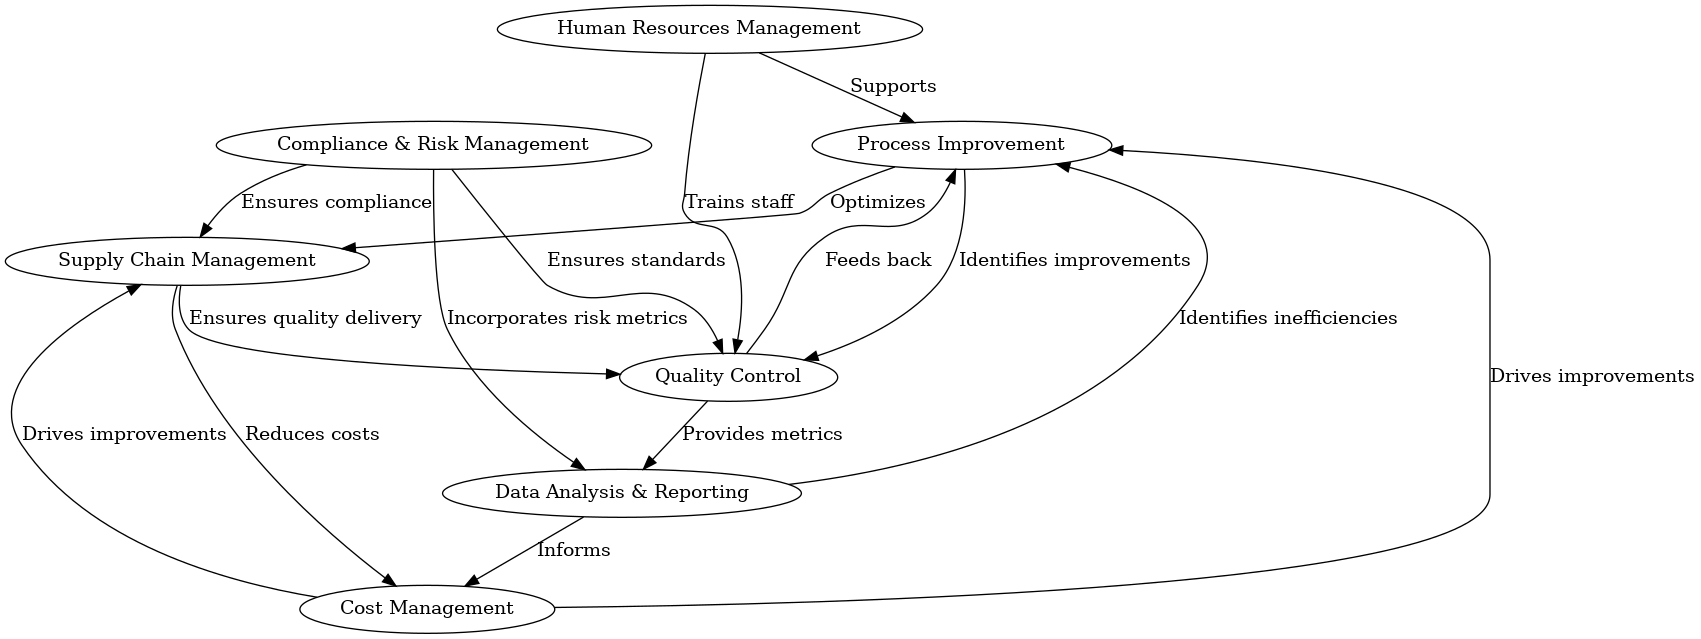

In [7]:
print("This is the image we will be analyzing")

show_img("sample_data/4_operations_interdependencies.png")

In [8]:
image_description_prompt = """
Please describe the attached image in full details, with a description of each object in the image. If the attached is a screenshot of a document page with multiple images in it, then you **MUST* repeat the below steps per image. 
Try to answer the following questions:

    1. What information does this image convey? 
    2. Given the below text context (Previous Page, Current Page, Next Page), how does this image add to the information?
    3. If this image is a natural image (people, scenery, city landscape, offices, etc..), describe all the objects in that image, and describe the background and setting of the image. 
    4. If this image is an organization chart, a flowchart, a process chart, or any chart that conveys relationships and progress in timeline or execution, please generate the text description of this chart as accurately as possible, as well as generate the Mermaid code to capture the full information in the chart. As an accurate and faithful assistant, you **MUST** be able to capture all the information in the chart. When generating Mermaid code, do not generate paranthesis in the node names inside the code, because it might throw an error. 
    5. If this image is an image of a numerical chart, like a line chart or a bar chart or a pie chart, generate a Markdown table that accurately represents the quantities being displayed. Describe in text the axes labels, the trend lines, the exact amounts, and so on and so forth. Be very descriptive when it comes to the numerical quantities: e.g. "the sales in May 2022 was $4.2 million", or "the market share of the X product is 22%", etc.. If this is a line chart, make sure that the values in the chart are aligned with the labels on the axes (X and Y are correct vs axes). You **MUST** output a Markdown representation of the data in a Markdown codeblock delimited by '```markdown' and '```'. The numbers **must absolutely** be accurate. Also you **MUST** output the Python code that enables the creation of the Pandas Dataframe of the data in the chart, but do not compute the data. After extracing the data, double check your results to make sure that the Markdown table and Python code are accurate and representative of the data in the image. In the generated code, give the dataframe a unique code variable name, like df_{purpose of the table}_{random number of 6 digits}. For example, if the table is about seasonal sales in 2023, then the dataframe name could be df_seasonal_sales_in_2023_3927364. This is to make sure that the dataframe name is unique and does not conflict with other dataframes in the code.
    6. For all other cases, describe what's in the image as elaborately and as detailed as possible. 
    7. If the image is that of a table, try to describe the table in full details, with a description of each column and row in the table. For each column, describe the header name, the data type and the purpose of the data and the column. If the table is a numerical table, try to describe the purpose and the trends of the different columns and rows in that table. In addition to that, output the table in Markdown format to be able to represent it in text. If the table is not clearly labeled, give the table a unique Title, based on the context supplied and the purpose of the table. If there are more than one table in the image, then describe each table separately. Please output the Markdown in a Markdown codeblock delimited by '```markdown' and '```'.
    8. Try to guess the purpose of why the authors have included this image in the document.
    9. If the attached is a screenshot of a document page with multiple images in it, then you **MUST* repeat the above steps per image and generate it all in the same output. 
    10. If any point in the above is not applicable, you do **NOT** have to say "Not applicable" or "Not applicable as this is not ...", you can just skip that point. No need for needless text or explanations to be generated.

"""

result, description = call_gpt4v('sample_data/4_operations_interdependencies.png', gpt4v_prompt = image_description_prompt, temperature = 0.2, model_info=model_info)
print(f"Status: {description}")
Markdown(result)


endpoint https://admin-m78bg318-swedencentral.openai.azure.com/openai/deployments/gpt4v/chat/completions?api-version=2023-12-01-preview
Status: Image was successfully explained, with Status Code: 200


The image is a complex flowchart that depicts various business functions and their interrelationships, focusing on quality control, process improvement, and other management areas. The chart is structured with ovals representing different management functions and arrows indicating the flow or influence between these functions.

Here is a description of the flowchart:

- "Human Resources Management" supports "Process Improvement."
- "Process Improvement" optimizes "Quality Control," identifies improvements in "Compliance & Risk Management," and identifies inefficiencies in "Supply Chain Management."
- "Quality Control" ensures standards for "Compliance & Risk Management," incorporates risk metrics for "Supply Chain Management," and provides metrics for "Data Analysis & Reporting."
- "Compliance & Risk Management" ensures compliance for "Supply Chain Management."
- "Supply Chain Management" ensures quality delivery and drives improvements for "Cost Management."
- "Data Analysis & Reporting" informs "Cost Management."
- "Cost Management" reduces costs for "Supply Chain Management."

The flowchart also includes feedback loops where "Process Improvement" feeds back into "Quality Control" and "Quality Control" drives improvements in "Process Improvement."

To generate the Mermaid code for this chart:

```mermaid
graph LR
    HRM(Human Resources Management) -->|Supports| PI(Process Improvement)
    PI -->|Optimizes| QC(Quality Control)
    PI -->|Identifies improvements| CRM(Compliance & Risk Management)
    PI -->|Identifies inefficiencies| SCM(Supply Chain Management)
    QC -->|Ensures standards| CRM
    QC -->|Incorporates risk metrics| SCM
    QC -->|Provides metrics| DAR(Data Analysis & Reporting)
    CRM -->|Ensures compliance| SCM
    SCM -->|Ensures quality delivery| CM(Cost Management)
    SCM -->|Drives improvements| CM
    DAR -->|Informs| CM
    CM -->|Reduces costs| SCM
    PI -->|Feeds back| QC
    QC -->|Drives improvements| PI
```

The purpose of this flowchart is likely to illustrate the interconnected nature of different management functions within an organization, emphasizing the central role of quality control and process improvement in driving efficiency and compliance. The flowchart helps to visualize the dynamic relationships and feedback mechanisms that exist between these functions, which can be useful for understanding organizational processes and identifying areas for improvement.

### Render the Mermaid code

To render the above generated Mermaid Code, please copy the above Mermaid script block, visit [mermaid.live](https://mermaid.live) in your browser, and paste the copied script in your browser. 

The image should be rendered immediately.

<br/>

![Mermaid Representation](../images/flowchart.png)

## Read a Powerpoint Slide

In [9]:
print("We will be analyzing the following Powerpoint slide.")

# Create a directory to store the outputs
work_dir = "sample_data/pdf_outputs_slide"
os.makedirs(work_dir, exist_ok=True)

# Load a sample PDF document

def read_pdf(pdf_doc):
    doc = fitz.open(pdf_doc)
    print(f"PDF File {os.path.basename(pdf_doc)} has {len(doc)} pages.")
    return doc

def nb_extract_pages_as_png_files(doc):
    png_files = []
    for page in doc:
        page_num = page.number
        img_path = f"{work_dir}/page_{page_num}.png"
        page_pix = page.get_pixmap(dpi=300)
        page_pix.save(img_path)
        print(f"Page {page_num} saved as {img_path}")
        png_files.append(img_path)
    
    return png_files

pdf_doc = "sample_data/1_slide_2.pdf"
doc = read_pdf(pdf_doc)
png_files = nb_extract_pages_as_png_files(doc)  

show_img(png_files[0], width=600)

We will be analyzing the following Powerpoint slide.
PDF File 1_slide_2.pdf has 1 pages.
Page 0 saved as sample_data/pdf_outputs_slide/page_0.png


In [10]:
result, description = call_gpt4v(png_files[0], gpt4v_prompt = image_description_prompt, temperature = 0.2, model_info=model_info)
print(f"Status: {description}")
Markdown(result)

endpoint https://admin-m78bg318-swedencentral.openai.azure.com/openai/deployments/gpt4v/chat/completions?api-version=2023-12-01-preview
endpoint https://admin-m78bg318-swedencentral.openai.azure.com/openai/deployments/gpt4v/chat/completions?api-version=2023-12-01-preview
Status: Image was successfully explained, with Status Code: 200


The image is a presentation slide that conveys information about the creation of a large global infrastructure private markets business through a combination of two entities. The slide is titled "Combination creates second-largest global infrastructure private markets business."

1. The image conveys that the combination of BlackRock Infrastructure and Global Infrastructure Partners (GIP) creates the second-largest private markets infrastructure manager, as indicated by the ranking and assets under management.

2. Without the context of the previous and next pages, it's not possible to say how this image adds to the information. However, it likely serves as a key point in a presentation about the strategic benefits of the combination of these two entities.

3. The image contains three pie charts and a bar chart:
   - The first pie chart represents BlackRock Infrastructure's position as #14 by client assets, with over $50 billion in assets.
   - The second pie chart represents Global Infrastructure Partners' position as #3 by client assets, with over $100 billion in assets.
   - The third pie chart shows the combined client assets of over $150 billion, indicating the scale of the new entity.
   - The bar chart on the right lists the top 10 infrastructure asset managers by client assets in billions of dollars. The combined BlackRock and GIP platform is highlighted in yellow as the second rank with over $150 billion, while the first rank has $243 billion.

4. This point is not applicable as there are no organization charts, flowcharts, process charts, or any charts that convey relationships and progress in a timeline or execution.

5. The bar chart displays numerical data. Here is the Markdown representation of the data:

```markdown
| Rank | Asset Manager           | Client Assets ($B) |
|------|-------------------------|--------------------|
| #1   | Competitor #1           | 243                |
| #2   | Combined BLK & GIP platform | 150+           |
| #3   | Competitor #3           | 136                |
| #4   | Competitor #4           | 75                 |
| #5   | Competitor #5           | 66                 |
| #6   | Competitor #6           | 65                 |
| #7   | Competitor #7           | 64                 |
| #8   | Competitor #8           | 64                 |
| #9   | Competitor #9           | 61                 |
| #10  | Competitor #10          | 56                 |
```

Here is the Python code to create a Pandas DataFrame of the data in the chart:

```python
import pandas as pd

# Unique DataFrame variable name
df_infra_assets_123456 = pd.DataFrame({
    'Rank': ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10'],
    'Asset Manager': ['Competitor #1', 'Combined BLK & GIP platform', 'Competitor #3', 'Competitor #4', 'Competitor #5', 'Competitor #6', 'Competitor #7', 'Competitor #8', 'Competitor #9', 'Competitor #10'],
    'Client Assets ($B)': [243, 150, 136, 75, 66, 65, 64, 64, 61, 56]
})
```

6. The image also includes a footnote that references slide 12 for more information, suggesting that there is additional context or data related to these figures.

7. This point is not applicable as there are no tables in the image.

8. The purpose of including this image in the document is likely to highlight the strategic significance of the combination of BlackRock Infrastructure and Global Infrastructure Partners, showcasing the scale and market position of the new entity compared to other competitors in the infrastructure investment space.

9. There are no multiple images within a document page; the steps have been applied to the single image provided.

10. All applicable points have been addressed.